#  <center>Practice Problem</center>

In [39]:
import os
import sys
cwd = os.getcwd()
print("Basic Program Information")
print("Current Directory - {:s}".format(cwd))
global globalLog
globalLog = False
global fh
if globalLog:
    fh = open("TEST.txt","w")

Basic Program Information
Current Directory - /media/removable/ext4/BigDataCode/Course Two - Visualization/WeekThree


## Set up for General Variables and Functions for Graphs

In [40]:
#
#  Graphing Variables
#
#Initialize Figure Variabls
numSamples = 10000
ax = [[None, None],
     [None, None],
     [None, None],
     [None, None],
     [None, None],
     [None, None]]

combinedFig = None
combinedColors = ['red','forestgreen','dodgerblue','magenta']
combinedData = [None, None, None, None]
combinedMinX = None
combinedMaxX = None
combinedMaxY = None
combinedMinY = 0.0
#
#  Initialize Hist Variables
#
nN = [None, None, None, None]
nBins = [None, None, None, None]
nBars = [None, None, None, None]
combinedBinArray = None
combinedN = [None,None,None,None]
combinedBins = [None,None,None,None]
combinedBars = [None,None,None,None]
combinedAnnotate = None
combinedTitle = None
#Initialize global variables
def indexRow(indx):
    return(indx // 2)
def indexCol(indx):
    return(indx % 2)

numDist = 4
normIndx = 0
expIndx = 1
gammaIndx = 2
unifIndx = 3
global X1
X1 = [None, None, None, None]
BinArray = [None, None, None, None]
MinX = [0.0,0.0,0.0,0.0]
MaxX = [0.0,0.0,0.0,0.0]
MinY = [0.0,0.0,0.0,0.0]
MaxY = [0.0,0.0,0.0,0.0]
Param = [[None,None],[None,None],[None,None],[None,None]]
TextX = [0.0,0.0,0.0,0.0]
TextY = [0.0,0.0,0.0,0.0]
Title = ["Normal Distribution", "Exponential Distribution", "Gamma Distribution", "Uniform Distribution"]
#
#  General graph functions
#
def textX(indx):
    if(indx != gammaIndx):
        return(MinX[indx] + (MaxX[indx] - MinX[indx])*.05)
    else:
        return(MaxX[indx] - (MaxX[indx] - MinX[indx])*.25)
def textY(indx):
    if(indx == unifIndx):
        return(MaxY[indx] * .85)
    else:
        return(MaxY[indx] * .85)
#
#  define which ones to graph
#
useGraph = [False, False, False, False]
distFunction = [None, None, None, None]

##  Define Common Histogram Functions

In [41]:
import scipy.stats as stats
from numpy import concatenate
#
#  Compute the number of bins and bin edges
#
def binEdgesAll():
    global X1
    combineA = concatenate((X1[0],X1[1],X1[2],X1[3]))
    nBins = numBins(combineA)//2
    bins = linspace(min(combineA),max(combineA),nBins)
    return(bins)

def numBins(x):
    irq = stats.iqr(x)
    N = float(x.size)
    h = 1.75*irq/(N ** (1./3.))
    return(ceil((max(x) - min(x))/h))
def binEdges(x):
    nBins = numBins(x)
    bins = linspace(min(x),max(x),nBins)
    return(bins)

def maxY(distNum, p1, p2):
    if(distNum == normIndx):
        return(normMaxY(p1,p2))
    elif(distNum == expIndx):
        return(expMaxY(p1))
    elif(distNum == unifIndx):
        return unifMaxY(p1,p2)
    elif(distNum == gammaIndx):
        return gammaMaxY(p1,p2)
    else:
        return(.75)

##  Define Normal Distribution Functions

In [42]:
from math import ceil, pi, sqrt
from numpy import min, max, random, std, mean, linspace,array,arange
import scipy.stats as stats
#
#  Set Using Normal Dist
#
wIndx = normIndx
useGraph[wIndx] = True

def normSampleInit(nSamples, m=0.0, s=1.0):
    numSamples = nSamples
    x = random.normal(m, s, numSamples)
    nBins = numBins(x)
    binArray = binEdges(x)
    return (x,binArray)

def normMaxY(m, s):
    v = 1.0/sqrt(2.0 * pi * s ** 2.0)
    return (v + .25*(1.1*ceil(v) - v))


#param1 is mean, param2 is sd - default values
Param[wIndx] = [0.0,1]

#  Initialize Norm Dist
distFunction[wIndx] = normSampleInit
X1[wIndx], BinArray[wIndx] = distFunction[wIndx](numSamples, Param[wIndx][0], Param[wIndx][1])
MinX[wIndx] = min(X1[wIndx])
MaxX[wIndx] = max(X1[wIndx])
MinY[wIndx] = 0.0
MaxY[wIndx] = maxY(wIndx,Param[wIndx][0],Param[wIndx][1])
TextX[wIndx] = textX(wIndx)
TextY[wIndx] = textY(wIndx)


## Define Gamma Distribution Funcations

In [43]:
from math import ceil, pi, sqrt
from numpy import min, max, random, std, mean, linspace,array,arange
import scipy.stats as stats
from scipy.special import gamma
#
#  Set Using Normal Dist
#
wIndx = gammaIndx
useGraph[wIndx] = True

def gammaSampleInit(nSamples, shape=1.0, scale=1.0):
    numSamples = nSamples
    x = random.gamma(shape, scale, numSamples)
    nBins = numBins(x)
    binArray = binEdges(x)
    return (x,binArray)

def gammaMaxY(shape, scale):
    v = gamma(shape) * (scale ** shape)
    return (1.1 / v)


#param1 is mean, param2 is sd - default values
Param[wIndx] = [2.0,1.0]

#  Initialize Norm Dist
distFunction[wIndx] = gammaSampleInit
X1[wIndx], BinArray[wIndx] = distFunction[wIndx](numSamples, Param[wIndx][0], Param[wIndx][1])
MinX[wIndx] = min(X1[wIndx])
MaxX[wIndx] = max(X1[wIndx])
MinY[wIndx] = 0.0
MaxY[wIndx] = maxY(wIndx,Param[wIndx][0],Param[wIndx][1])
TextX[wIndx] = textX(wIndx)
TextY[wIndx] = textY(wIndx)

##  Define Uniform Distribution Functions

In [44]:
from numpy import min, max, random
#
#  Set Using Uniform Distribution
#
wIndx = unifIndx
useGraph[wIndx] = True

def unifMaxY(lb,ub):
    return((1.0 + 1./(ub - lb))/2.)

def unifSampleInit(nSamples, lb, ub):
    numSamples = nSamples
    x = random.uniform(lb, ub, numSamples)
    nBins = numBins(x)
    binArray=binEdges(x)
    return (x,binArray)

Param[wIndx] = [0.0, 3.0]
distFunction[wIndx] = unifSampleInit
X1[wIndx], BinArray[wIndx] = distFunction[wIndx](numSamples, Param[wIndx][0], Param[wIndx][1])
MinX[wIndx] = min(X1[wIndx])
MaxX[wIndx] = max(X1[wIndx])
MinY[wIndx] = 0.0
MaxY[wIndx] = maxY(wIndx,Param[wIndx][0],Param[wIndx][1])
TextX[wIndx] = textX(wIndx)
TextY[wIndx] = textY(wIndx)

## Define Exponential Distribution Functions

In [45]:
#
#  Set Using Exponential Distribution
#  Note:  This uses the scale parameter which is 1/mean
#
wIndx = expIndx
useGraph[wIndx] = True

def expMaxY(beta):
    return(1.1*(1.0/beta))

def expSampleInit(nSamples, beta, nothing):
    numSamples = nSamples
    x = random.exponential(beta, numSamples)
    nBins = numBins(x)
    binArray=binEdges(x)
    return (x,binArray)

Param[wIndx] = [1.0, None]
distFunction[wIndx] = expSampleInit
X1[wIndx], BinArray[wIndx] = distFunction[wIndx](numSamples, Param[wIndx][0], Param[wIndx][1])
MinX[wIndx] = min(X1[wIndx])
MaxX[wIndx] = max(X1[wIndx])
MinY[wIndx] = 0.0
MaxY[wIndx] = maxY(wIndx,Param[wIndx][0],Param[wIndx][1])
TextX[wIndx] = textX(wIndx)
TextY[wIndx] = textY(wIndx)

##  Combined Distribution Functions

In [46]:
from numpy import max, min, mean, std
def maxYAll():
    return(max(MaxY))
def maxXAll():
    return(max(MaxX))
def minXAll():
    return(min(MinX))

def meanAll(allX):
    combineA = concatenate((allX[0],allX[1],allX[2],allX[3]))
    return(mean(combineA))

def stdAll(allX):
    combineA = concatenate((allX[0],allX[1],allX[2],allX[3]))
    return(std(combineA,ddof=1))

def sampleAll(nSample):
    global X1
    global fh, globalLog
    if globalLog:
        fh.writelines("In Sample All " + str(nSample) + "\n")
    allSample = [None, None, None, None]
    for i in range(4):
        allSample[i] = X1[i][0:nSample]
    return(allSample)

<IPython.core.display.Javascript object>


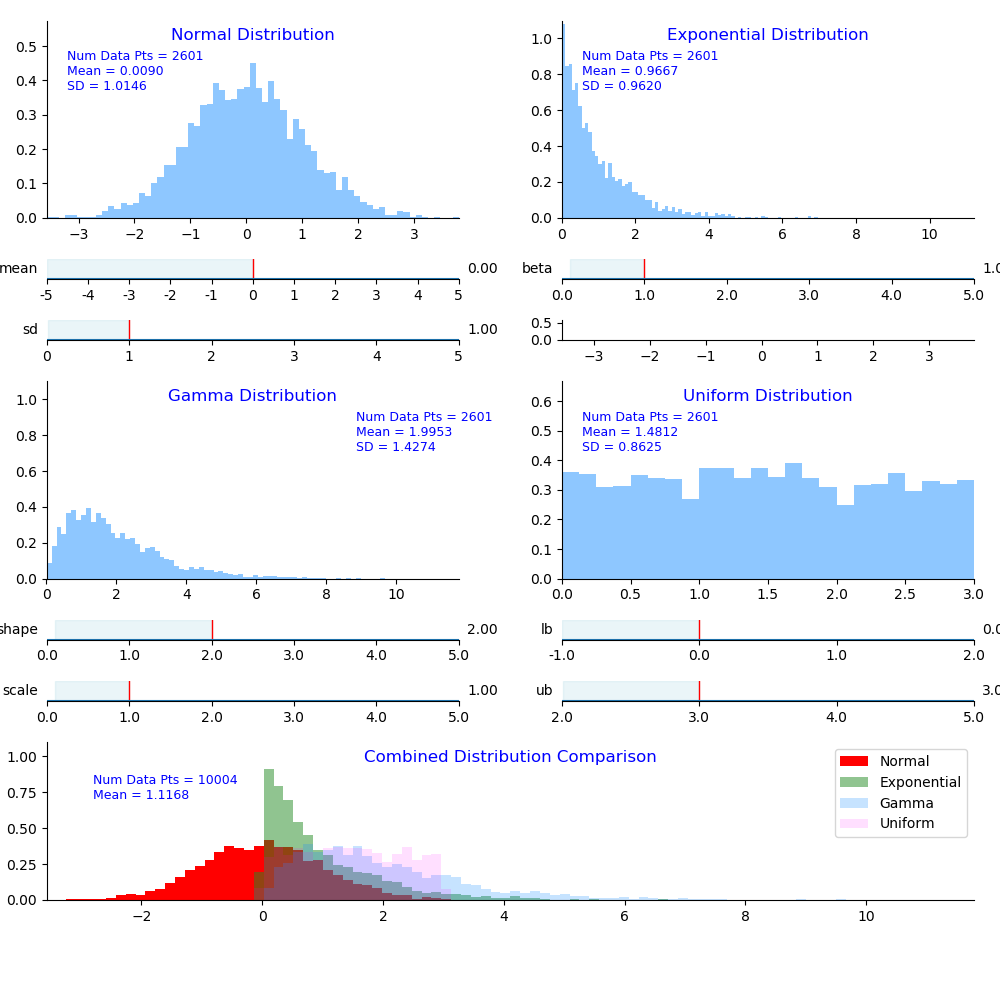

In [47]:

#Define the backend
%matplotlib notebook
#
#  Define the global dependencies
#
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.animation import FuncAnimation
from matplotlib.widgets import Slider, Button, RadioButtons
from numpy import min, max

#
#  Define the standard look feel
#
global anim, combinedAnim
global tData,lastFrame
global combinedN, combinedBins, combinedBars
global combinedTitle
global combinedLabels
combinedLabels = ['Normal','Exponential','Gamma','Uniform']
anim = [None, None, None, None]
combinedAnim = None
combinedTitle = None
nRows = 7
nCols = 2
tData = -2
lastFrame = -1
def setStandardLF():
    for i in range(nRows-1):
        for j in range(nCols):
            if(ax[i][j] is not None):
                ax[i][j].spines['top'].set_visible(False)
                ax[i][j].spines['right'].set_visible(False)
                ax[i][j].set_xlim(MinX[0],MaxX[0])
                ax[i][j].set_ylim(MinY[0],MaxY[0])

def rc(i):
    ir = indexRow(i)
    ic = indexCol(i)
    r = distRows[ir]
    c = distCols[ic]
    return r,c

distRows = [0,3]
distCols = [0,1]
#
#  initialize figure
#
frameSize = 100
frameIndx = range(0,numSamples+frameSize,frameSize)
txtAnnotation = [None, None, None, None]
titleAnnotation = [None, None, None, None]


heights = [10,1,1,10,1,1,8]
widths = [10,10]
spec3 = gridspec.GridSpec(nrows=nRows,ncols=nCols,height_ratios=heights,width_ratios=widths)
figSize = [10,10]
plt.rcParams['figure.figsize']=figSize
fig = plt.figure(num='Learning from Distributions')
ax[0][0] = fig.add_subplot(spec3[0,0])
ax[1][0] = fig.add_subplot(spec3[1,0])
ax[2][0] = fig.add_subplot(spec3[2,0])

ax[0][1] = fig.add_subplot(spec3[0,1])
ax[1][1] = fig.add_subplot(spec3[1,1])
ax[2][1] = fig.add_subplot(spec3[2,1])

ax[3][1] = fig.add_subplot(spec3[3,1])
ax[4][1] = fig.add_subplot(spec3[4,1])
ax[5][1] = fig.add_subplot(spec3[5,1])

ax[3][0] = fig.add_subplot(spec3[3,0])
ax[4][0] = fig.add_subplot(spec3[4,0])
ax[5][0] = fig.add_subplot(spec3[5,0])

combinedFig = fig.add_subplot(spec3[6,:])
fig.tight_layout()
#fig, ((ax1)) = plt.subplots(1,1,sharex=True, sharey=True)
fig.subplots_adjust(bottom=0.1, wspace = .25)
setStandardLF()

for i in range(numDist):
    if(useGraph[i]):
        r,c = rc(i)
        nN[i], nBins[i], nBars[i] = ax[r][c].hist(X1[i][0],bins=BinArray[i],density=True,color='dodgerblue',alpha=.5)
        ax[r][c].set_xlim(MinX[i],MaxX[i])
        ax[r][c].set_ylim(MinY[i],MaxY[i])
        txtAnnotation[i] = None
        titleAnnotation[i] = None
#
#  compute if all graphs exist
allGraphs = useGraph[0] and useGraph[1] and useGraph[2] and useGraph[3]
if allGraphs:
    combinedAnnotate = None
    combinedData = sampleAll(numSamples)
    combinedMinX = minXAll()
    combinedMaxX = maxXAll()
    combinedMaxY = maxYAll()
    alphaLevel = [1.0,.5,.25,.125]
    combinedFig.spines['top'].set_visible(False)
    combinedFig.spines['right'].set_visible(False)
    combinedFig.set_xlim(combinedMinX,combinedMaxX)
    combinedFig.set_ylim(combinedMinY,combinedMaxY)
    combinedBinArray = binEdgesAll()
    tData = sampleAll(1)
    for i in range(4):
        combinedN[i], combinedBins[i], combinedBars[i] = combinedFig.hist(tData[i],bins=combinedBinArray,density=True,
                                                        color=combinedColors[i],alpha=alphaLevel[i])
    
    
def animUpdate(frame, distNum):
    xData = X1[distNum][0:frame+1]
    xMean = mean(xData)
    numData = xData.size
    r,c = rc(distNum)
    t = [b.remove() for b in nBars[distNum]]
    if txtAnnotation[distNum] is not None:
        ax[r][c].texts.remove(txtAnnotation[distNum])
    annotateStr = "Num Data Pts = " + str(numData) + "\nMean = {:6.4f}".format(xMean)
    if numData > 2:
        xSD = std(xData,ddof=1)
        annotateStr = annotateStr + "\nSD = {:6.4f}".format(xSD)
    else:
        if(titleAnnotation[distNum] is not None):
            ax[r][c].texts.remove(titleAnnotation[distNum])
        meanX = (MaxX[distNum] + MinX[distNum])* .5
        locY = .9*MaxY[distNum]
        titleAnnotation[distNum] = ax[r][c].annotate(Title[distNum],xy=(meanX,locY),horizontalalignment='center',
                                                     color='b',fontsize=12)
    
    nN[distNum], nBins[distNum], nBars[distNum] = ax[r][c].hist(xData,bins=BinArray[distNum],density=True, 
                                                                color='dodgerblue',alpha=.5)
    txtAnnotation[distNum] = ax[r][c].annotate(annotateStr,xy=(TextX[distNum],TextY[distNum]),
                                               verticalalignment='top',color='b',fontsize=9)  



def animUpdateAll(frame):
    global combinedFig, combinedAnim
    global combinedN, combinedBins, combinedBars, combinedBniArray
    global combinedAnnotate, combinedTitle
    global tData, lastFrame
    alphaLevel = [1.0,.5,.25,.125]
    lastFrame = frame
    if combinedAnnotate is not None:
        combinedFig.texts.remove(combinedAnnotate)


    for i in range(4):
        t = [b.remove() for b in combinedBars[i]]
    tData = sampleAll(frame+1)
    allMean = meanAll(tData)
    allNumData = 4 * (frame + 1)

    annotateStr = "Num Data Pts = " + str(allNumData) + "\nMean = {:6.4f}".format(allMean)
    for i in range(4):
        combinedN[i], combinedBins[i], combinedBars[i] = combinedFig.hist(tData[i],bins=combinedBinArray,density=True,
                                                    color=combinedColors[i],alpha=alphaLevel[i],label=combinedLabels[i])
    xLoc = combinedMinX + (combinedMaxX - combinedMinX)*.05
    yLoc = .8 * combinedMaxY
    if combinedTitle is None:
        meanX = (combinedMinX + combinedMaxX)*.5
        topY = .95 * combinedMaxY
        combinedTitle = combinedFig.annotate("Combined Distribution Comparison",xy=(meanX,topY),
                                             verticalalignment='top',horizontalalignment='center',
                                            color='b',fontsize=12)    
    combinedAnnotate = combinedFig.annotate(annotateStr,xy=(xLoc,yLoc),verticalalignment='top',color='b',fontsize=9)
    if(frame < 2):
        plt.sca(combinedFig)
        plt.legend(loc='upper right')
    
    

def setSliderProp(ax, minVal, maxVal):
    ax.plot([minVal,maxVal],[0,0])
    plt.sca(ax)
    plt.xticks(arange(minVal,maxVal+1),arange(minVal,maxVal+1))
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)


def updateNormalMean(val):
    updateDist(val,normIndx,0)
    
def updateNormalSD(val):
    updateDist(val,normIndx,1)
    
def updateUniformLB(val):
    updateDist(val,unifIndx,0)
def updateUniformUB(val):
    updateDist(val,unifIndx,1)
    
def updateGammaShape(val):
    updateDist(val,gammaIndx,0)
def updateGammaScale(val):
    updateDist(val,gammpIndx,1)
    
def updateExpBeta(val):
    updateDist(val, expIndx, 0)

def updateDist(val,distNum, par):
    global anim, combinedAnim
    anim[distNum].event_source.stop()
    combinedAnim.event_source.stop()
    Param[distNum][par] = val
    r,c = rc(distNum)
    X1[distNum], BinArray[distNum] = distFunction[distNum](numSamples, Param[distNum][0],Param[distNum][1])
    MinX[distNum] = min(X1[distNum])
    MaxX[distNum] = max(X1[distNum])
    #Change this to a function of the dist
    MaxY[distNum] = maxY(distNum, Param[distNum][0], Param[distNum][1])
    TextX[distNum] = textX(distNum)
    TextY[distNum] = textY(distNum)
    t = [b.remove() for b in nBars[distNum]]
    if txtAnnotation[distNum] is not None:
        ax[r][c].texts.remove(txtAnnotation[distNum])
    if titleAnnotation[distNum] is not None:
        ax[r][c].texts.remove(titleAnnotation[distNum])
    ax[r][c].set_xlim(MinX[distNum],MaxX[distNum])
    ax[r][c].set_ylim(MinY[distNum],MaxY[distNum])
    txtAnnotation[distNum] = None
    titleAnnotation[distNum] = None
    nN[distNum], nBins[distNum], nBars[distNum] = ax[r][c].hist(X1[distNum][0],bins=BinArray[distNum],density=True,
                                                                color='dodgerblue',alpha=.5)
    anim[distNum] = FuncAnimation(fig, animUpdate, frames = frameIndx, fargs=[distNum], 
                                  interval=500, blit=True, repeat=False)
    #
    #  restart the combined graph
    #
    combinedData = sampleAll(numSamples)
    combinedMinX = minXAll()
    combinedMaxX = maxXAll()
    combinedMaxY = maxYAll()
    combinedFig.set_xlim(combinedMinX,combinedMaxX)
    combinedFig.set_ylim(combinedMinY,combinedMaxY)
    combinedAnim = FuncAnimation(fig, animUpdateAll, frames = frameIndx, interval=500, blit=True,repeat=False)
    
sNormalMean = Slider(ax[1][0], 'mean', -5., 5., valinit=Param[normIndx][0],valfmt="%4.2f", alpha=.25,color="lightblue")  
sNormalSD = Slider(ax[2][0],'sd',.01,5.0,valinit=Param[normIndx][1],valfmt="%4.2f",alpha=.25,color="lightblue")
setSliderProp(ax[1][0],-5,5)
setSliderProp(ax[2][0],0,5)


sUniformLB = Slider(ax[4][1], 'lb', -1., 2., valinit=Param[unifIndx][0],valfmt="%4.2f", alpha=.25,color="lightblue")  
sUniformUB = Slider(ax[5][1],'ub',2.01,5.0,valinit=Param[unifIndx][1],valfmt="%4.2f",alpha=.25,color="lightblue")
setSliderProp(ax[4][1],-1,2.)
setSliderProp(ax[5][1],2.0,5)

sGammaShape = Slider(ax[4][0], 'shape', .1, 5., valinit=Param[gammaIndx][0],valfmt="%4.2f", alpha=.25,color="lightblue")  
sGammaScale = Slider(ax[5][0],'scale',.1,5.0,valinit=Param[gammaIndx][1],valfmt="%4.2f",alpha=.25,color="lightblue")
setSliderProp(ax[4][0],0,5.)
setSliderProp(ax[5][0],0,5.)

sExpBeta = Slider(ax[1][1], 'beta', .1, 5., valinit=Param[expIndx][0],valfmt="%4.2f", alpha=.25,color="lightblue")  
setSliderProp(ax[1][1],0.,5)


sNormalMean.on_changed(updateNormalMean)
sNormalSD.on_changed(updateNormalSD)
sUniformLB.on_changed(updateUniformLB)
sUniformUB.on_changed(updateUniformUB)
sGammaShape.on_changed(updateGammaShape)
sGammaScale.on_changed(updateGammaScale)

sExpBeta.on_changed(updateExpBeta)

#axfreq = plt.axes([0.25,0.0, 0.65, 0.03], facecolor='r')



anim[normIndx] = FuncAnimation(fig, animUpdate, frames = frameIndx, fargs=[normIndx],interval=500, blit=True, repeat=False)
anim[unifIndx] = FuncAnimation(fig, animUpdate, frames = frameIndx, fargs=[unifIndx],interval=500, blit=True, repeat=False)
anim[expIndx] = FuncAnimation(fig, animUpdate, frames = frameIndx, fargs=[expIndx],interval=500, blit=True, repeat=False)
anim[gammaIndx] = FuncAnimation(fig, animUpdate, frames = frameIndx, fargs=[gammaIndx],interval=500, blit=True, repeat=False)
combinedAnim = FuncAnimation(fig, animUpdateAll, frames = frameIndx, interval=500, blit=True,repeat=False)

plt.show()
